In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#   Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [9]:
def within_var(img):
    size = img.size
    final_thresh = -1
    min_val = 50000
    val_lst = []
    hist, bins = np.histogram(img, np.arange(44))
    for t in bins[0:-2]:
        #   Calculating Wb and Wf
        num_b = np.sum(hist[:t+1])
        num_f = np.sum(hist[t+1:])
        Wb = num_b / (float(size))
        Wf = num_f / (float(size))

        #   Calculating variance
        ub = np.sum(bins[:t+1] * hist[:t+1]) / float(num_b)
        uf = np.sum(bins[t+1:-1] * hist[t+1:]) / float(num_f)
        sigma_b2 = np.sum(np.square(bins[:t+1] - ub) * hist[:t+1]) / float(num_b)
        sigma_f2 = np.sum(np.square(bins[t+1:-1] - uf) * hist[t+1:]) / float(num_f)

        val = Wb*sigma_b2 + Wf*sigma_f2
        val_lst.append(val)
        
        if val < min_val:
            final_thresh = t
            min_val = val

    otsu_img = img.copy()
    otsu_img[otsu_img >= final_thresh] = 255
    otsu_img[otsu_img < final_thresh] = 0

    print("============== Within Variance ==============")
    print("MIN value of Within_Variance:", min_val)
    print('Final threshold:', final_thresh)
    print(np.round(val_lst, 3))

    return otsu_img.astype(np.uint8)

In [10]:
def between_var(img):
    size = img.size
    final_thresh = -1
    max_val = -1
    val_lst = []
    hist, bins = np.histogram(img, np.arange(0, 44))
    for t in bins[:-2]:
        num_b = np.sum(hist[:t+1])
        num_f = np.sum(hist[t+1:]) 
        Wb = num_b / float(size)
        Wf = num_f / float(size)
        ub = np.sum(bins[:t+1] * hist[:t+1]) / float(num_b)
        uf = np.sum(bins[t+1:-1] * hist[t+1:]) / float(num_f)

        val = Wb * Wf * np.square((ub-uf))
        val_lst.append(val)

        if val > max_val:
            final_thresh = t
            max_val = val

    otsu_img = img.copy()
    otsu_img[otsu_img >= final_thresh] = 255
    otsu_img[otsu_img < final_thresh] = 0
    
    print("============== Between Variance (Recommended) ==============")
    print("MAX value of Between_Variance:", max_val)
    print('Final threshold:', final_thresh)
    print(np.round(val_lst, 3))
    return otsu_img.astype(np.uint8)

In [5]:
# img = np.array([[1, 1, 1, 1, 1, 1],
#                  [0, 2, 2, 2, 2, 2],
#                  [0, 0, 3, 3, 3, 3],
#                  [0, 0, 0, 4, 4, 4],
#                  [0, 0, 0, 0, 5, 5],
#                  [0, 0, 0, 0, 0, 6]]).ravel()

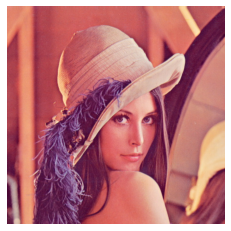

In [8]:
img = mpimg.imread("lena.jpg")
plt.imshow(img, cmap = 'gray')
plt.axis('off');

In [2]:
img = np.array([[1,2,7,4,5,6,7],
                [8,9,10,11,7,13,14],
                [8,16,17,18,19,6,21],
                [22,23,7,25,26,27,28],
                [29,30,31,32,33,34,35],
                [36,37,38,39,40,8,42]])

(array([0., 1., 1., 0., 1., 1., 2., 4., 3., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <BarContainer object of 43 artists>)

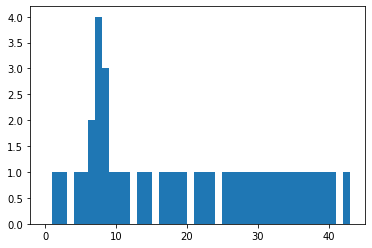

In [5]:
plt.hist(img.ravel(), bins = np.arange(44))
# plt.xlim((0, 258))

In [12]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Gray", gray)

within = within_var(img)
# cv2.imshow("Within Variance", within)

between = between_var(img)
# cv2.imshow("Between Variance", between)

# cv2.waitKey()
# cv2.destroyAllWindows()

============== Within Variance ==============
MIN value of Within_Variance: 30.206277056277056
Final threshold: 19
[    nan 144.228 136.117 136.117 129.405 123.176 111.304  86.353  65.73
  58.794  52.298  46.248  46.248  41.672  37.574  37.574  34.994  32.906
  31.311  30.206  30.206  30.652  31.595  33.036  33.036  36.035  39.532
  43.526  48.019  53.009  58.498  64.485  70.971  77.955  85.438  93.42
 101.901 110.88  120.358 130.333 140.799 140.799]
============== Between Variance (Recommended) ==============
MAX value of Between_Variance: 122.62875695732836
Final threshold: 19
[    nan   8.607  16.718  16.718  23.43   29.659  41.531  66.482  87.105
  94.041 100.537 106.587 106.587 111.163 115.261 115.261 117.841 119.929
 121.524 122.629 122.629 122.183 121.24  119.799 119.799 116.8   113.303
 109.309 104.816  99.826  94.337  88.35   81.864  74.88   67.397  59.415
  50.934  41.955  32.477  22.502  12.036  12.036]


In [1]:
import numpy as np

In [109]:
A = np.array([[-26, -33, -25],
              [ 31,  42,  23],
              [-11, -15, -4]])
U, S, V = np.linalg.svd(A)

In [79]:
print("======= U =======\n", U)
print("======= S =======\n", np.diag(S))
print("======= V.T =======\n", V)

======= U =======
 [[-0.63071697 -0.64622679  0.42963593]
 [ 0.73818949 -0.32889103  0.58898808]
 [-0.23931647  0.68863751  0.68447499]]
======= S =======
 [[77.21898942  0.          0.        ]
 [ 0.          6.55308885  0.        ]
 [ 0.          0.          0.53357269]]
======= V.T =======
 [[ 0.54280685  0.7175355   0.4364671 ]
 [-0.14782922 -0.4299502   0.89066792]
 [-0.82674497  0.54798324  0.1273072 ]]


In [113]:
#   Cách tìm SVD của 1 ma trận A bất kì
#   U, V là các ma trận orthonormal(trực chuẩn) (tích vô hướng 2 vecto bất kì bằng 0 và norm2 của 1 vecto bất kỳ = 1)

#   C = AT.A
#   eigen_val, eigen_vec = np.linalg.eig(C)

#   S = np.sqrt(np.diag(eigen_val))
#   V = eigen_vec
#   A.V = U.S => U = (A.V).S^(-1)

print("U\n", np.dot(np.dot(A, V.T), np.linalg.inv(np.diag(S))))

U
 [[-0.63071697 -0.64622679  0.42963593]
 [ 0.73818949 -0.32889103  0.58898808]
 [-0.23931647  0.68863751  0.68447499]]


In [114]:
C = np.dot(A.T, A)

In [115]:
val, vec = np.linalg.eig(C)
S = np.sqrt(np.diag(np.array([val[0], val[2], val[1]])))
V = np.array([vec[:, 0], vec[:, 2], vec[:, 1]])
print("U\n", np.dot(np.dot(C, V), np.linalg.inv(S)))
# print("Singular Value:", np.sqrt(val))
# print("V\n", vec)
V

U
 [[ -31.87282786 -227.38119859 2778.656047  ]
 [ -42.05376472 -301.74163824 3677.7284761 ]
 [ -25.96061874 -177.66734098 2218.00432393]]


array([[-0.54280685, -0.7175355 , -0.4364671 ],
       [-0.14782922, -0.4299502 ,  0.89066792],
       [-0.82674497,  0.54798324,  0.1273072 ]])

In [116]:
vec

array([[-0.54280685, -0.82674497, -0.14782922],
       [-0.7175355 ,  0.54798324, -0.4299502 ],
       [-0.4364671 ,  0.1273072 ,  0.89066792]])